J'ai choisi de me baser sur un autre problème évoquer dans une autre vidéo de Sentdex car je le trouve plus simple à prendre en main. La situation est la suivante : 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
n = p = 5
field = np.zeros((n,p))#Soit notre plateau de jeu, une grille de 10 x 10
print(field)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
#Soit un joueur, un ennemi et une nourriture disposés aléatoirement sur le plateau.
#Soit la classe Blob qui est la classe qui représente ces 3 entités. Blob possède 3 attributs : son nom, sa position en x et sa position en y

class Blob:
  def __init__(self,name,x,y):
    self.name = name
    self.x = x
    self.y = y
    
  def position_x(self):#Retourne la position en x de player
    return self.x

  def position_y(self): #Retourne la position en y de player
    return self.y  
    
  def position(self):#Retourne un tuple de position_x et position_y
    return (self.x,self.y  )

  def droite(self):#Le Blob avance d'une case vers la droite
    self.y += 1
    if (self.y >=4):
      self.y = 4

  def gauche(self):#Le Blob avance d'une case vers la gauche
    self.y -= 1
    if (self.y <= 0):
      self.y = 0

  def haut(self):#Le Blob avance d'une case vers le haut
    self.x -= 1
    if (self.x <0):
      self.x = 0

  def bas(self):#Le Blob avance d'une case vers le bas
    self.x += 1
    if (self.x >=4):
      self.x = 4
  
   
  def nothing(self):#Le Blob ne fait rien
    pass

  def copy(self):#Copie superficielle du blob
    copy = Blob(self.name,self.x,self.y)
    return copy
    
  def move(self,choice):#Actions du Blob
    if (choice == 0):
      self.droite();
    elif (choice == 1):
      self.gauche();
    elif (choice == 2):
      self.haut();
    elif (choice == 3):
      self.bas();

  def __eq__(self,other):#Egalité
    if (self.position_x() == other.position_x() and self.position_y() == other.position_y()):
      return True
    else:
      return False
  def __sub__(self,other): #Soustraction
    return (self.x - other.x,self.y - other.y)

  def __str__(self): #Retourne un String qui décrit les attributs de player
    return 'Name({self.name}),Position({self.x}, {self.y})'.format(self=self)

Créons player.

In [ ]:
def maj_field(n,p,player,food,enemy): #Met à jour le plateau de jeu
  field = np.zeros((n,p)) #Initialisation du plateau de jeu de la taille nxp
  field[player.position_x(),player.position_y()] = 1#On ajoute joueur à la grille
  field[food.position_x(),food.position_y()] = 2 #On ajoute food à la grille
  field[enemy.position_x(),enemy.position_y()] = 3#On ajoute enemy à la grille
  return field

In [ ]:
field = np.zeros((n,p))#Soit notre plateau de jeu, une grille de 10 x 10

generator_random = np.random.default_rng()#Random generator initialisation
x = generator_random.integers(0,n)#Random x dans la limite de la grille
print("x = ",x)
y = generator_random.integers(0,p)#Random y dans la limite de la grille
print("y = ",y)
player = Blob("Player",x,y)#Création de player

field[player.position_x(),player.position_y()] = 1#On ajoute joueur à la grille
print(field)

x =  1
y =  4
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


On crée l'ennemi et la nourriture. On suppose en générant aléatoirement les positions qu'un player ne sera pas sur un ennemy ou un food.


In [ ]:

x = generator_random.integers(0,n)#Random x dans la limite de la grille
print("x = ",x)
y = generator_random.integers(0,p)#Random y dans la limite de la grille
print("y = ",y)
enemy = Blob("Enemy",x,y)#Initialisation de Enemy

field[enemy.position_x(),enemy.position_y()] = 2#On ajoute enemy à la grille
print(field)

x = generator_random.integers(0,n)#Random x dans la limite de la grille
print("x = ",x)
y = generator_random.integers(0,p)#Random y dans la limite de la grille
print("y = ",y)
food = Blob("Food",x,y)#Initialisation de Food

field[food.position_x(),food.position_y()] = 3 #On ajoute food à la grille
print(field)

x =  4
y =  1
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]
x =  2
y =  2
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]


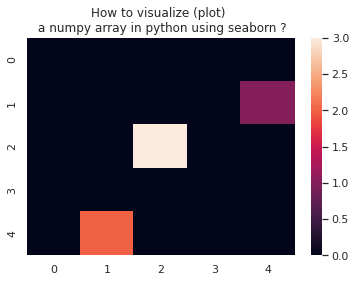

In [ ]:
import seaborn as sns; sns.set() #Recopiage d'un code qui affiche un joli tableau
import matplotlib.pyplot as plt

ax = sns.heatmap(field, annot=False, fmt="float")

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()

On a la situation de départ. On a besoin de notre Q-table. Mais pour la construire, on doit déterminer l'état initial, l'état final et les actions.

Soit l'état initial la position aléatoire de notre joueur. Soit l'état final, le moment où player.position_x = food.position x and player.position_y = food.position_y<br/>
Soit les 5 action possibles : bouger en haut, bouger en bas, bouger à gauche, bouger à droite et ne rien faire. <br/>

Ajoutons les actions à la classe Blob. (voir classe Blob définit plus haut)



In [ ]:
#Test des actions du Blob
blob_2 = Blob("blob2",1,2)#Initialisation de blob_2
blob_2.droite()#Action d'aller à droite
print(blob_2.position_x())
blob_2.gauche()#Action d'aller à gauche
print(blob_2.position_x())
blob_2.haut()#Action d'aller en haut
print(blob_2.position_y())
blob_2.bas()#Action d'aller en bas
print(blob_2.position_y())

1
1
2
2


Je teste si la fonction gauche fonctionne et si le plateau affiche bien la nouvelle situation.

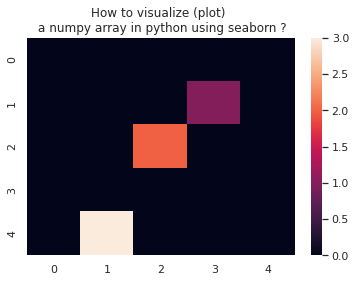

In [ ]:
player.gauche() #Action de bouger à gauche de player
field = maj_field(n,p,player,food,enemy) #Mise à jour du plateau de jeu 
ax = sns.heatmap(field, annot=False, fmt="float")#Affichage du plateau de jeu

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()

Extrait de Wikipédia sur la Q-table  https://fr.wikipedia.org/wiki/Q-learning

```
initialiser Q[s, a] pour tout état s, toute action a de façon arbitraire, mais Q(état terminal, a) = 0 pour toute action a

répéter
      //début d'un épisode 
      initialiser l'état s
      
      répéter
               //étape d'un épisode
               choisir une action a depuis s en utilisant la politique spécifiée par Q (par exemple ε-greedy)
               exécuter l'action a
               observer la récompense r et l'état s'

               Q[s, a] := Q[s, a] + α[r + γ maxa' Q(s', a') - Q(s, a)]

               s := s'
               a := a'
      jusqu'à ce que s soit l'état terminal
```



Soit le pseudo code du Q-learning. Déterminons chacune de ces constantes.

Soit r la récompense reçue par player après une action. Il existe 3 cas : player a atteint food, player a atteint enemy et player n'a atteint ni l'un ni l'autre.

In [ ]:
R_ENEMY = -100
R_FOOD = 0
MOVE_PENALTY = -1

Soit alpha le facteur d'apprentissage entre 0 et 1, avec 1 l'agent ne regarde que ce qu'il a appris avec la dernière action et 0 l'agent n'apprend rien. 

In [ ]:
alpha = 0.1

Soit gamma le facteur d'actualisation entre 0 et 1, l'agent regarde des récompenses lointaines avec 1 et 0 l'agent ne considère que la récompense prochaine.

In [ ]:
gamma = 0.98

Soit la méthode epsylon_greedy qui permet d'ajouter une part d'aléatoire 

In [ ]:
epsylon = 0.9

Soit epsylon_delta le pas qui réduit la part d'aléatoire.

In [ ]:
epsylon_delta = 0.0005

Soit le brouillon suivant : 

0.9977523551677719
0


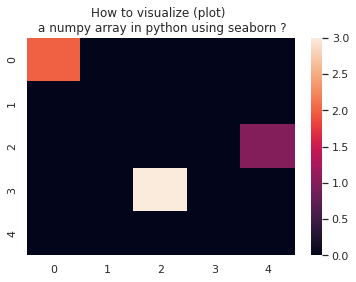

In [ ]:
def game_initialisation(n,p): #Initialisation du jeu
  field = np.zeros((n,p))#Soit notre plateau de jeu, une grille de 10 x 10
  generator_random = np.random.default_rng() 
  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  player = Blob("Player",x,y)

  field[player.position_x(),player.position_y()] = 1#On ajoute joueur à la grille
  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  enemy = Blob("Enemy",x,y)

  field[enemy.position_x(),enemy.position_y()] = 2#On ajoute enemy à la grille
  # print(field)

  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  food = Blob("Food",x,y)

  field[food.position_x(),food.position_y()] = 3#On ajoute food à la grille
  return field,player,enemy,food

nb_episodes = 1
etat_final = False
for i in range(nb_episodes): #On répète le jeu entièrement 10 épisodes
  field,player,enemy,food = game_initialisation(n,p)#On initialise le jeu
  while (not etat_final):#Tant qu'on n'a pas atteint l'état final
    generator_random = np.random.default_rng()
    random_action = generator_random.random()
    print(random_action)
    if (random_action > epsylon):
      epsylon += epsylon_delta
      action = generator_random.integers(0,4)
      print(action)
    else:
      pass
    etat_final = True

ax = sns.heatmap(field, annot=False, fmt="float")

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()

Il nous reste à initialiser la Q_table et à la remplir de manière arbitraire. <br/>
Soit la clé du dictionnaire Q_table, le tuple représentant : <br/>
-La distance entre la nourriture et le player<br/>
-La distance entre l'ennemi et le player

In [ ]:
def Q_table_initialisation():
  generator_random = np.random.default_rng() #Initialisation de la seed
  Q_table = {} #Initialisation du dictionnaire Q-table
  for x1 in range(-n+1,n): #Parcours des clés de Q-table
    for y1 in range(-p+1,p):
      for x2 in range(-n+1,n):
        for y2 in range(-p+1,p):
          for action in range(4):
              Q_table[(x1,y1),(x2,y2),action] = np.random.uniform(-5,0) #Valeur aléatoire attribuée à chaque clé de Q-table
  return Q_table
Q_table =  Q_table_initialisation() #Initialisation de Q-table
print(Q_table)#Vérification des valeurs de Q-table

{((-4, -4), (-4, -4), 0): -1.1541245986470408, ((-4, -4), (-4, -4), 1): -4.169864328814058, ((-4, -4), (-4, -4), 2): -3.657448642414469, ((-4, -4), (-4, -4), 3): -1.303942291794928, ((-4, -4), (-4, -3), 0): -4.952040360407781, ((-4, -4), (-4, -3), 1): -3.886843423277624, ((-4, -4), (-4, -3), 2): -4.893675404725789, ((-4, -4), (-4, -3), 3): -4.775438244896298, ((-4, -4), (-4, -2), 0): -2.318706343103074, ((-4, -4), (-4, -2), 1): -1.6034101718747085, ((-4, -4), (-4, -2), 2): -2.389252488935429, ((-4, -4), (-4, -2), 3): -3.620845139781979, ((-4, -4), (-4, -1), 0): -4.833234338830198, ((-4, -4), (-4, -1), 1): -1.7816427676415674, ((-4, -4), (-4, -1), 2): -3.9005068640875624, ((-4, -4), (-4, -1), 3): -2.2424819161197163, ((-4, -4), (-4, 0), 0): -3.3203670206252776, ((-4, -4), (-4, 0), 1): -2.4259013793460893, ((-4, -4), (-4, 0), 2): -4.76094574694496, ((-4, -4), (-4, 0), 3): -0.4620649983208054, ((-4, -4), (-4, 1), 0): -1.3088667941032677, ((-4, -4), (-4, 1), 1): -1.9279570556414534, ((-4, 

On a notre Q_table de prête. Soit le code qui permet de mettre à jour la table en fonction de la prochaine potentielle action.

In [ ]:
def Q_table_reward(player,food,enemy):#Donner que les états et vérifier qu'un tuple est en (0,0) extraire les clés
  if (player == food):#Si le joueur a atteint la position de food
    reward = R_FOOD
  elif (player == enemy):#Si le joueur a atteint la position de enemy
    reward = R_ENEMY
  else:#Si le joueur n'a rien atteint
    reward = MOVE_PENALTY
  return reward

blob_3.droite()#Action droite
reward = Q_table_reward(blob_3,food,enemy)#Calcul de la récompense
print(reward)
print(blob_3.position())

-1
(2, 4)


In [ ]:
def game_initialisation(n,p):#Initialisation du jeu
  field = np.zeros((n,p))#Soit notre plateau de jeu, une grille de 10 x 10
  generator_random = np.random.default_rng()
  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  player = Blob("Player",x,y)

  field[player.position_x(),player.position_y()] = 1#On ajoute joueur à la grille
  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  enemy = Blob("Enemy",x,y)
  field[enemy.position_x(),enemy.position_y()] = 2#On ajoute enemy à la grille
  x = generator_random.integers(0,n)
  y = generator_random.integers(0,p)
  food = Blob("Food",x,y)
  field[food.position_x(),food.position_y()] = 3 #On ajoute food à la grille
  # print(field)
  return field,player,enemy,food

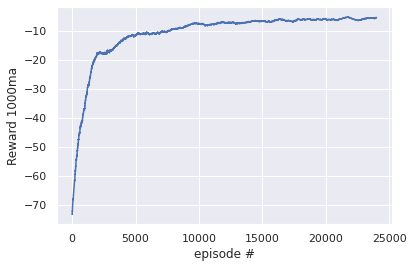

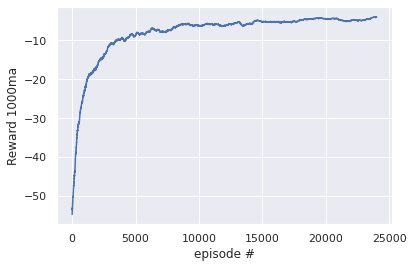

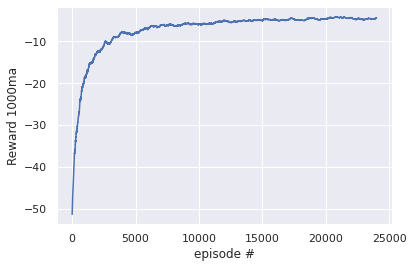

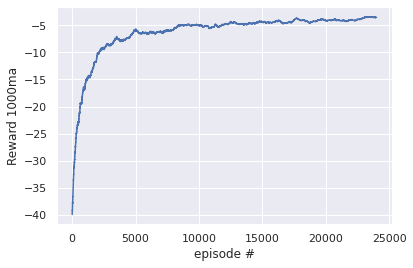

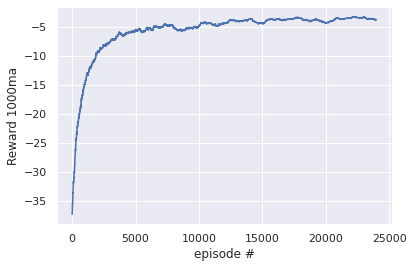

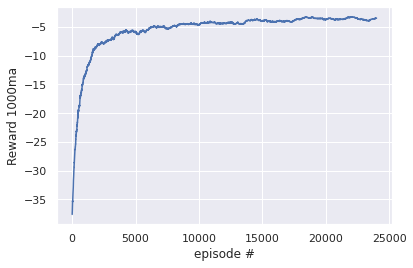

In [ ]:
nb_episodes = 25000 #Nombre de fois que l'on va refaire une partie

SHOW_EVERY = 1000 #Constante pour ne prendre en compte que des tranches de 1000 épisodes
nb_alpha = [0.1,0.2,0.3,0.5,0.7,0.9]#Différentes valeurs de alpha pour tester les capacités de la Q-table

for alpha in nb_alpha:
  episode_rewards = [] #Tableau qui stocke la récompense obtenues à l'issue de la fin d'une partie
  Q_table = Q_table_initialisation()#On initialiser la Q_table
  for episode in range(nb_episodes): #On répète le jeu entièrement pendant nb_episodes
    etat_final = False #On n'a pas encore atteint la fin du jeu
    if episode % SHOW_EVERY == 0: #Est-ce qu'on montre ou non la partie en cours
        show = True
    else:
        show = False
    episode_reward = 0 #La récompense est initialisée à 0
    field,player,enemy,food = game_initialisation(n,p)#On initialise le jeu

    while (not etat_final and not etape == 200):#Tant qu'on n'a pas atteint l'état final

      generator_random = np.random.default_rng() #Initialisation de la seed
      random_action = generator_random.random() #Calcul de random_action pour savoir si on effectue une action au hasard
      if (random_action > epsylon):#Si l'agent fait une action au pif
        epsylon += epsylon_delta #On ajoute epsylon_delta pour que l'agent fasse de moins en moins d'actions au hasard
        action = generator_random.integers(0,3)#On choisit parmi les 4 actions une action
      else:#L'action est déterminée avec la Q-table
        obs_food = player - food #On regarde à combien de distance la nourriture se trouve par rapport à player
        obs_enemy = player - enemy #On regarde à combien de distance l'enemy se trouve par rapport à player
        actions_possibles = [Q_table[obs_food,obs_enemy,0],Q_table[obs_food,obs_enemy,1],Q_table[obs_food,obs_enemy,2],Q_table[obs_food,obs_enemy,3]]#Voir les actions possibles
        action = np.argmax(actions_possibles)#Récupérer la meilleure action        

      player.move(action)#Effectuer la meilleure action 
      reward = Q_table_reward(player,food,enemy)#Calculer la récompense 
      new_obs_food = player - food #On regarde à combien de distance la nourriture se trouve par rapport à player après action
      new_obs_enemy = player - enemy #On regarde à combien de distance l'enemy se trouve par rapport à player après action
      actions_possibles_futures = [Q_table[new_obs_food,new_obs_enemy,0],Q_table[new_obs_food,new_obs_enemy,1],Q_table[new_obs_food,new_obs_enemy,2],Q_table[new_obs_food,new_obs_enemy,3]]#Voir les actions possibles dans le futur

      action_future = np.max(actions_possibles_futures)#Récupérer la valeur de la meilleure action

      current_q = Q_table[obs_food,obs_enemy,action] #On récupère la valeur de la Q-table qui correspond à l'ancienne position
    

      Q_table[obs_food,obs_enemy, action] = (1 - alpha) * Q_table[obs_food,obs_enemy,action] + alpha * (reward + gamma * action_future) #Màj de la Q-table
      
      plt.show()
      if (player == food or player == enemy): #Si on a fini le jeu
        etat_final = True

      episode_reward += reward #On ajoute la récompense à episode_reward
      if reward == R_FOOD or reward == R_ENEMY: 
              break

    episode_rewards.append(episode_reward) #On ajoute la episode_reward finale à episode_rewards le tablea de toutes les récompenses
  
  moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid') #Calcul de la moyenne des récompenses toutes les 1000 parties grâce à une convolution

  plt.plot([i for i in range(len(moving_avg))], moving_avg)#Affichage de la moyenne des récompenses
  plt.ylabel(f"Reward {SHOW_EVERY}ma")
  plt.xlabel("episode #")
  plt.show()

On peut voir que plus alpha est grand et plus l'agent apprend vite.
